<a href="https://colab.research.google.com/github/Shikher-jain/Data_Science/blob/main/Predictor/studentPredictorPassedOrFailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [90]:
df = pd.read_csv('marks1.csv')
df

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,6.5,85,78,Yes,7,Yes
1,4.0,65,50,No,6,No
2,5.2,75,68,Yes,7,Yes
3,3.8,60,45,No,5,No
4,7.0,90,82,Yes,8,Yes
5,2.5,55,40,No,6,No
6,6.0,80,75,Yes,7,Yes
7,4.5,70,55,Yes,6,No
8,5.8,78,72,Yes,7,Yes
9,3.2,62,48,No,5,No


In [91]:
df.shape

(20, 6)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudyHours  20 non-null     float64
 1   Attendance  20 non-null     int64  
 2   PastScore   20 non-null     int64  
 3   Internet    20 non-null     object 
 4   SleepHours  20 non-null     int64  
 5   Passed      20 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


In [93]:
df.describe()

,StudyHours,Attendance,PastScore,SleepHours
count,20.000000,20.000000,20.000000,20.000000
mean,4.915000,72.700000,62.400000,6.450000
std,1.493592,11.639768,15.010172,0.998683
min,2.500000,55.000000,40.000000,5.000000
25%,3.725000,61.500000,49.500000,6.000000
50%,5.000000,73.500000,64.000000,6.500000
75%,6.075000,80.750000,75.250000,7.000000
max,7.200000,92.000000,85.000000,8.000000


In [94]:
df.isnull().sum()

,0
StudyHours,0
Attendance,0
PastScore,0
Internet,0
SleepHours,0
Passed,0


In [95]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [96]:
le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudyHours  20 non-null     float64
 1   Attendance  20 non-null     int64  
 2   PastScore   20 non-null     int64  
 3   Internet    20 non-null     int64  
 4   SleepHours  20 non-null     int64  
 5   Passed      20 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [97]:
features = ['StudyHours', 'Attendance', 'PastScore', 'Internet','SleepHours']

In [98]:
scaler = StandardScaler()
df1 = df.copy()
df1[features] = scaler.fit_transform(df1[features])
df1.head()

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,1.088769,1.084174,1.066294,0.816497,0.565032,1
1,-0.628532,-0.678711,-0.847567,-1.224745,-0.462299,0
2,0.195772,0.202732,0.382772,0.816497,0.565032,1
3,-0.765916,-1.119432,-1.189328,-1.224745,-1.489630,0
4,1.432229,1.524895,1.339703,0.816497,1.592363,1


In [103]:
X = df1[features]
y =df1['Passed']

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [110]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

[[2 1]
 [0 1]]


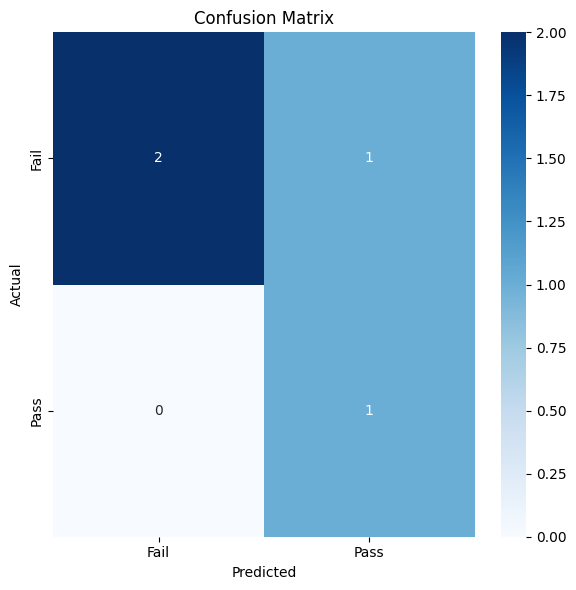

In [125]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues',xticklabels=['Fail','Pass'],yticklabels=['Fail','Pass'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [140]:
try:
    study_hours = float(input('Enter Study Hours'))
    attendance = float(input('Enter Attendance'))
    past_score = float(input('Enter Past Score'))
    internet = float(input('Enter Internet'))
    sleep_hours = float(input('Enter Sleep Hours'))

    user_input = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendance': attendance,
        'PastScore': past_score,
        'Internet': internet,
        'SleepHours': sleep_hours
    }])

    user_input_scale = scaler.transform(user_input)
    prediction = model.predict(user_input_scale)[0]

    if prediction == 1:
        print('Student will Pass')
    else:
        print('Student will Fail')

except ValueError:
    print('Invalid input. Please enter valid numerical values.')


Enter Study Hours5
Enter Attendance80
Enter Past Score89
Enter Internet1
Enter Sleep Hours8
Student will Pass


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
